## Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods

### Section 1

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns  
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = (100)

Implementing functions

In [2]:
def f_cube(x):
    return x ** 3


def f_abs(x):
    return abs(x - 0.2)
    

def f_sin(x):
    return x * np.sin(1/x)

Implementing algorithms

In [3]:
def bruteforce_search(f, a, b , e):
    i = 0
    x_min = a
    f_min = f(a)
    x_lst = np.arange(a, b+e, e)
    for x in x_lst: # run through the all elements and calculate function values
        f_x = f(x) 
        if f_x < f_min:
            f_min = f_x
            x_min = x
        i += 1
    return f'x = {round(x_min, 3)}, f(x) = {round(f_min, 3)}, iterations = {i}'
        

def dichotomy_search(f, a, b, e): 
    i = 0
    while abs(b - a) >  e:
        x = (a + b)/2
        x1 = (x - e)
        x2 = (x + e)
        if f(x2) > f(x1): # selecting between two distinct alternatives at each step
            b = x
        else:
            a = x
        i += 1
    return f'x = {round((a + b)/2, 3)}, f(x) = {round(f((a + b)/2), 3)},  iterations = {i}'


def golden_search(f, a, b, e, i=0):
    i = 0
    k = (1 + 5**(0.5))/2 # golden ratio
    while abs(b - a) >= e: # narrowing the range of values on the specified interval
        x1 = b - ((b - a)/k)
        x2 = a + ((b - a)/k)
        if f(x1) > f(x2):
            a = x1
        else:
            b = x2
        i += 1
    return f'x = {round(((a+b)/2),3)}, f(x) = {round(f((a+b)/2),3)}, iterations = {i}'
    

Vizualization of results

In [4]:
bruteforce_search(f_cube, 0, 1, 0.001), dichotomy_search(f_cube, 0, 1, 0.001), golden_search(f_cube, 0, 1, 0.001)

('x = 0, f(x) = 0, iterations = 1001',
 'x = 0.0, f(x) = 0.0,  iterations = 10',
 'x = 0.0, f(x) = 0.0, iterations = 15')

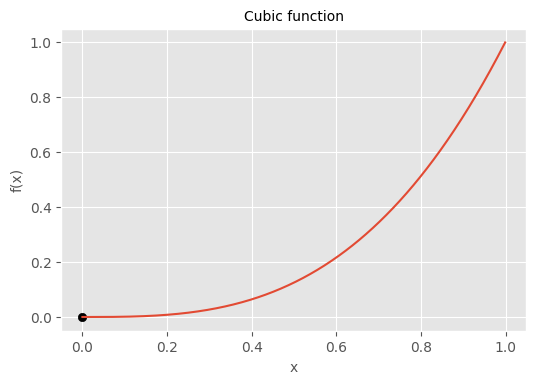

In [5]:
x_arr = np.arange(0, 1, 0.001)
plt.plot(x_arr, x_arr**3)
plt.scatter(0, 0, color='black')
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.title('Cubic function', size=10)
plt.show()

In [6]:
bruteforce_search(f_abs, 0, 1, 0.001), dichotomy_search(f_abs, 0, 1, 0.001), golden_search(f_abs, 0, 1, 0.001)

('x = 0.2, f(x) = 0.0, iterations = 1001',
 'x = 0.2, f(x) = 0.0,  iterations = 10',
 'x = 0.2, f(x) = 0.0, iterations = 15')

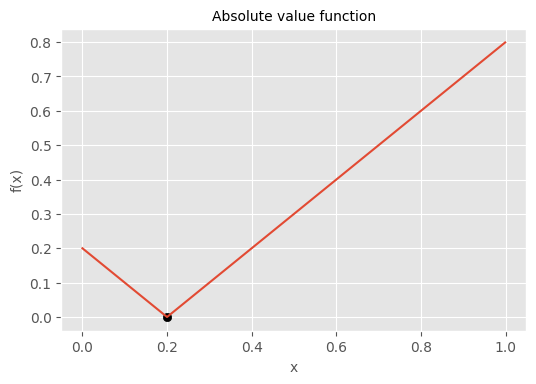

In [7]:
x_arr = np.arange(0, 1, 0.001)
plt.plot(x_arr, abs(x_arr - 0.2))
plt.scatter(0.2, 0, color='black')
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.title('Absolute value function', size=10)
plt.show()

In [8]:
bruteforce_search(f_sin, 0.01, 1, 0.001), dichotomy_search(f_sin, 0.01, 1, 0.001), golden_search(f_sin, 0.01, 1, 0.001)

('x = 0.223, f(x) = -0.217, iterations = 991',
 'x = 0.222, f(x) = -0.217,  iterations = 10',
 'x = 0.223, f(x) = -0.217, iterations = 15')

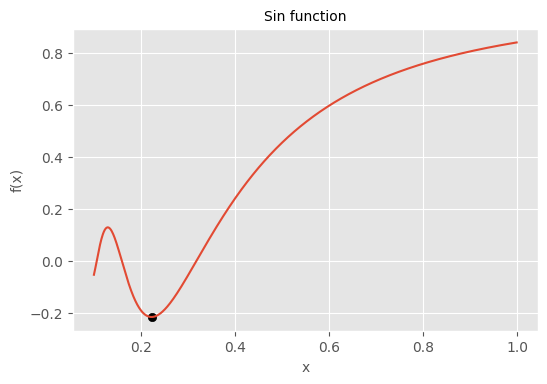

In [9]:
x_arr = np.arange(0.1, 1, 0.001)
plt.plot(x_arr, x_arr*np.sin(1/x_arr))
plt.scatter(0.223, -0.217, color='black')
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.title('Sin function', size=10)
plt.show()

### Section 2

Params generation

In [10]:
alpha = float(np.random.random(1))
beta = float(np.random.random(1))
delta_k = np.random.standard_normal(100)

Data generation

In [11]:
x_k = np.arange(0, 100, 1)/100
y_k = alpha*x_k + beta + delta_k

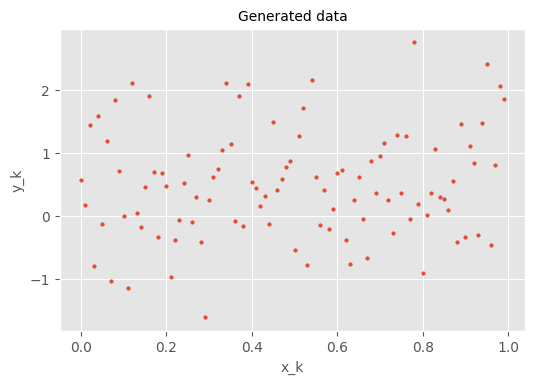

In [12]:
plt.scatter(x_k, y_k, s=6)
plt.xlabel('x_k', fontsize=10)
plt.ylabel('y_k', fontsize=10)
plt.title('Generated data', size=10)
plt.show()

Implementing functions

In [13]:
def f_linear(x, a, b):
    return a*x + b
    
    
def f_rational(x, a, b):
    return a/(1+b*x)


def f_loss(x, f):
    result = 0
    for i in range(len(x_k)):
        result += (f(x_k[i], x[0], x[1]) - y_k[i])**2
    return result

Implementing algorithms

In [14]:
def bruteforce_search(function, args):
    return scipy.optimize.brute(function, ranges=(slice(0, 1, 0.001), (slice(0, 1, 0.001))), args=(args,))


def gauss_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='CG', args=(args,))


def neldermead_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='Nelder-Mead', args=(args,))

Apply algorithms

In [15]:
a_bruteforce, b_bruteforce = bruteforce_search(f_loss, f_linear)
a_gauss, b_gauss = gauss_search(f_loss, f_linear).x
a_neldermead, b_neldermead = neldermead_search(f_loss, f_linear).x

In [16]:
a_bruteforce, a_gauss, a_neldermead

(0.31574505599811675, 0.31571825200501497, 0.3157047051935657)

In [17]:
b_bruteforce, b_gauss, b_neldermead

(0.3439692874461412, 0.3439986905009303, 0.3439920593917037)

Vizualization of results

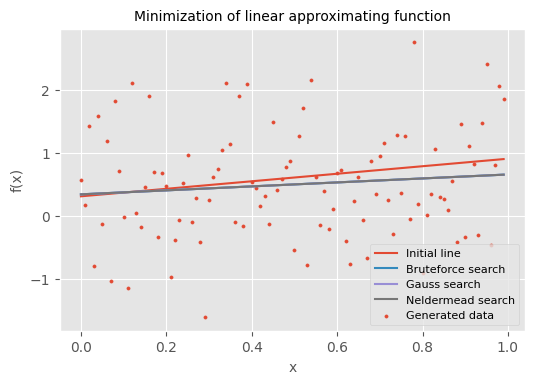

In [18]:
plt.scatter(x_k, y_k, s=5, label='Generated data')
plt.plot(x_k, alpha*x_k + beta, label='Initial line')
plt.plot(x_k, a_bruteforce*x_k + b_bruteforce, label='Bruteforce search')
plt.plot(x_k, a_gauss*x_k + b_gauss, label='Gauss search')
plt.plot(x_k, a_neldermead*x_k + b_neldermead, label='Neldermead search')
plt.title('Minimization of linear approximating function', size=10)
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.legend(fontsize=8)
plt.show()

In [19]:
a_bruteforce, b_bruteforce = bruteforce_search(f_loss, f_rational)
a_gauss, b_gauss = gauss_search(f_loss, f_rational).x
a_neldermead, b_neldermead = neldermead_search(f_loss, f_rational).x

In [20]:
a_bruteforce, a_gauss, a_neldermead

(0.3134959285549424, 0.3135144873525643, 0.31352440988987845)

In [21]:
b_bruteforce, b_gauss, b_neldermead

(-0.6303042580191659, -0.6302562652229349, -0.6302389889167785)

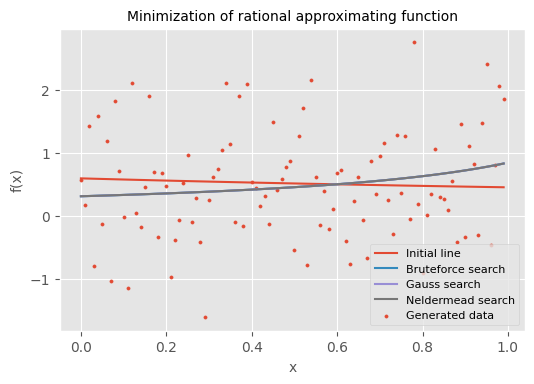

In [22]:
plt.scatter(x_k, y_k, s=5, label='Generated data')
plt.plot(x_k, alpha/(1+beta*x_k), label='Initial line')
plt.plot(x_k, a_bruteforce/(1+b_bruteforce*x_k), label='Bruteforce search')
plt.plot(x_k, a_gauss/(1+b_gauss*x_k), label='Gauss search')
plt.plot(x_k, a_neldermead/(1+b_neldermead*x_k), label='Neldermead search')
plt.title('Minimization of rational approximating function', size=10)
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.legend(fontsize=8)
plt.show()